# Introduction to Neural Networks

### Designed by: Elizaveta Semenova
### Speaker: Maria Han Veiga

### <span style="color:coral">NumPy</span>

Neural Nets require a lot of matrix operations. NumPy allows to work with tensors efficiently. It is important for us to look at it now also for better understanding of TensorFlow.

**Tensor** is a generalizaion of a matrix, same as a matrix is a generalization of a vector, and a vector is a generalization of a scalar.


#### Examples:

Scalar is **0**-dimensional tensor:
$$a = \begin{pmatrix}a \end{pmatrix}$$

Vector is **1**-dimensional tensor:
$$v = \begin{pmatrix}a \\ b \end{pmatrix}$$

Matrix is **2**-dimensional tensor:
$$m = \begin{pmatrix}a & b\\\ c & d\end{pmatrix}$$

Tensor is an **n**-dimensional object (as far as we are concerned...).

$$t = \begin{pmatrix} \begin{pmatrix}a & b\\\ c & d\end{pmatrix}, \begin{pmatrix}e & f\\\ g & h\end{pmatrix}, \begin{pmatrix}i & j\\\ k & l\end{pmatrix} \end{pmatrix}$$


#### Dimentionality
is the number of indices which we need to know to extract one number out of a tensor:
$$a=a$$

$$a=v[1]$$

$$a=m[1,1]$$

In NumPy <span style="color:magenta">ndarray</span> allows us to work with tensors:

In [4]:
import numpy as np
a = np.array(1)
v = np.array([1,2,3])
m = np.array([[1,2,3], [4,5,6]])
t = np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])
print(a.shape)
print(v.shape)
print(m.shape)
print(t.shape)


()
(3,)
(2, 3)
(2, 2, 3)


#### NumPy data types 

are wider than that of Python. 

For instance, instead of **float** one can opt for **float16**, **float32**, **float64**.

More details [here](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html).

In [5]:
type(v[0])

numpy.int64

#### Operations in NumPy

- addition of a scalar

In [6]:
v += 5
print(v)

[6 7 8]


- multiplication by a scalar

In [7]:
m *=0
print(m)

[[0 0 0]
 [0 0 0]]


- dot product

In [8]:
print(np.dot(v, v))

149


When can the dot product of two vectors be useful for NLP? If there is a way to represent each text as a vector of a fixed length, we can measure the distance between two given texts/vectors, for instance, with cosine (as seen before):
$$\cos(v1,v2)=\frac{(v1,v2)}{\vert v1 \vert * \vert v2\vert} $$

- matrix multiplication

In [9]:
m = np.array([[1,2], [3,4]])
print(np.matmul(m, m))
print(np.dot(m, m))

[[ 7 10]
 [15 22]]
[[ 7 10]
 [15 22]]


- element-wise matrix multiplication

In [10]:
print(m*m)
print(np.multiply(m, m))

[[ 1  4]
 [ 9 16]]
[[ 1  4]
 [ 9 16]]


- matrix transpose

In [11]:
print(m.T)

[[1 3]
 [2 4]]


#### Documentation

http://www.numpy.org/

### <span style="color:coral">Some Machine Learning concepts</span>
   * Learning  = improving with experience at some task: 
     * improve at task T, 
     * with respect to performance measure P, 
     * based on experience E.


   * Types of ML tasks:
     * Supervised (labeled data)
       * Classification (categorical data)
       * Regression (continuous data)
     * Unsupervised (not labeled data)
       * Clustering

   * Typical workflow: 
        * get and prepare data, 
        * training, 
        * validation, 
        * repeat training-validation.
   * Loss function
   * Regularization

### <span style="color:coral">Neural Networks and Deep Learning</span>

**Neural networks** are great approximators of non-linear functions. For instance they are able to find non-linear multidimentional boundaries in the context of classification. We will see a good example later.

The building block of a neural net is **perceptron**:

![alt text](pics/perceptron.png)


Here $x_1, ..., x_n$ are **input features**, $b$ is the **bias** and $W$ denotes the **weights**.

The node is activated via an **activation function**, depending on the linear combinaton $x^{T}W+b:$
$$ y=\phi(x^{T}W+b).$$

**Deep Learning** is the study of artificial neural networks containing more than one layer.

Feedforward Neural Network performs static mapping from the inputs to the outpus via a given architechture and parameters (weights and biases). The task of a Neural Network is to find the best set of weights $W$ and biases $b$, given inputs $x$ and outputs $y$. We start with random weights and update them during the training process to minimize the loss function.

![alt text](pics/large_net.png)

Mathematical tools of Deep Learning:

- Linear algebra [Cheatsheet](http://www.souravsengupta.com/cds2016/lectures/Savov_Notes.pdf)
- Statistics [Cheatsheet](http://tutorial.math.lamar.edu/pdf/Calculus_Cheat_Sheet_All.pdf)
- Calculus [Cheatsheet](http://web.mit.edu/~csvoss/Public/usabo/stats_handout.pdf)

### Training

Training consist of multiple repetitions of the cycle **Feedforward-Backpropagation**.

![alt text](pics/cycle.png)


Let us consider a basic Neural Net with one hidden layer, i.e. it consists of an input layer, a hidden layer and an output layer.

![alt text](pics/feedforward.png)

Each of the inputs $(x_1,....,x_{n_0})$ is connected to all of the neurons in the hidden layer $(h_1,..., h_{n_1})$ with corresponding weights $W^1_{ij}$, and each of the hidden layers $(h_1,..., h_{n_1})$ is connected to the output $y$ with weights $W^2_{i1}$. Each of the layers has their activation function:

$$h=\Phi(x, W^1),$$
$$y=\Phi(h, W^2).$$

### Feedforward

In the **Feedforward** stage we compute forward (left to right) and obtain the output of the system with the current values of parameters. It will be compared to the true ouptput, resulting in an error:

![alt text](pics/feedforward.png)

$$h=\phi(x, W^1);$$

$$y=\phi(h, W^2).$$

To compute the hidden layer we first perform the linear transformation of the input layer and then apply the activation function

$$ (h^{\text{lin}}_1,..., h^{\text{lin}}_{n_1}) = (x_1,...,x_{n_0}) \begin{pmatrix}W^1_{1,1} & W^1_{1,2} & ... & W^1_{1,n_1}\\\ W^1_{2,1} & W^1_{2,2} & ... & W^1_{2,n_1} \\\ ... & ... & ... & ...\\\ W^1_{n_0,1} & W^1_{n_0,2} &... & W^1_{n_0,n_1}\end{pmatrix},$$

$$h = \phi(h^{\text{lin}}). $$

Analogously,
$$ (y^{\text{lin}}_1,..., y^{\text{lin}}_{n_2}) = (h_1,...,h_{n_1}) \begin{pmatrix}W^1_{1,1} & W^1_{1,2} & ... & W^1_{1,n_2}\\\ W^1_{2,1} & W^1_{2,2} & ... & W^1_{2,n_2} \\\ ... & ... & ... & ...\\\ W^1_{n_1,1} & W^1_{n_1,2} &... & W^1_{n_1,n_2}\end{pmatrix}$$

and

$$y = \phi(y^{\text{lin}}). $$

### Activation functions for hidden layers

- Sigmoid

$$\phi(x) = \frac{1}{1 + \exp(-x)}$$


In [12]:
import matplotlib.pyplot as plt
def line_graph(x, y, x_title, y_title):
    plt.plot(x, y)
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.show()

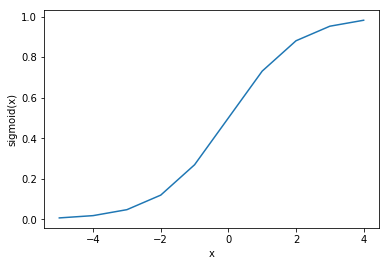

In [13]:
import numpy as np
x = range(-5, 5)

def sigmoid(inputs):
    return [1 / float(1 + np.exp(- x)) for x in inputs]
     
y_sigmoid = sigmoid(x)
line_graph(x, y_sigmoid, "x", "sigmoid(x)")

- Hyperbolic tangent

$$\phi(x) = \tanh(x)$$

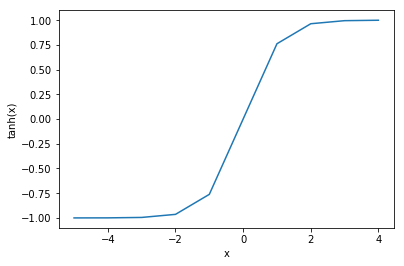

In [14]:
def tanh(inputs):
    values = [ np.tanh(x) for x in inputs]
    return values

y_tanh = tanh(x)
line_graph(x, y_tanh, "x", "tanh(x)")

- Rectified Linear Unit fuction (ReLU)

$$\phi(x) = x I_{x \ge 0}$$

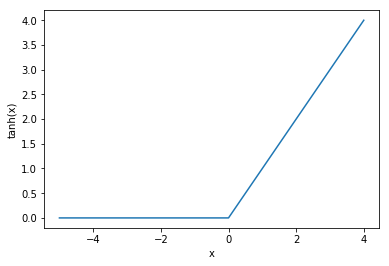

In [15]:
def ReLU(inputs):    
    values = [x if x>0 else 0 for x in inputs]
    return values

y_relu = ReLU(x)
line_graph(x, y_relu, "x", "tanh(x)")

### Activation functions for the output layer

- Sigmoid

$$\phi(x) = \frac{1}{1 + \exp(-x)}$$

- Softmax

$$\phi(x)_k = \frac{\exp(- x_k)}{\sum_{i=1}^K \exp(-x_i)}$$

- Linear

$$\phi(x) = x$$

In [16]:
def softmax(inputs):
    exp_inputs = np.exp(inputs)
    out = np.divide (exp_inputs, exp_inputs.sum())
    return out

softmax([1, 0.5, 2])

array([0.2312239 , 0.14024438, 0.62853172])

### Error functions

-  Mean Squared Error (MSE), for regression 

$$ E = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2$$

In [17]:
def mse(y, yhat):
    y = np.array(y)
    yhat = np.array(yhat)
    out = np.sum((y-yhat)**2)/len(y)
    return out

y=[1,0,1,1]
yhat=[0.4,0.6,0.1,0.5]
round(mse(y, yhat),2)

0.44

-  Cross-entropy, for classification

$$ E = - \frac{1}{n}\sum_{i=1}^n  \left( y_i \log(\hat{p}_i) + (1- y_i) \log(1-\hat{p}_i) \right)$$

In [18]:
def cross_entropy(y, p):
    y = np.array(y)
    p = np.array(p)
    out = - (np.dot(y, np.log(p)) + np.dot(1-y, np.log(1-p)))
    return out

y=[1,0,1,1]
p=[0.4,0.6,0.1,0.5]
print(round(cross_entropy(y, p),2))

4.83


### Backpropagation

During **Backpropagation** we compute backwards (right to left) and update the weights to minimize the error.

![alt text](pics/backprop.png)

### Gradient Descent

Generally, **gradient** of a function $E(x_1,...,x_n)$

$$\nabla_{(x_1,...,x_n)} E =  \begin{pmatrix} \frac{\partial E}{\partial x_1} \\ ... \\ \frac{\partial E}{\partial x_n} \end{pmatrix}$$

is a vector in the direction of the fastest growth of a function. Since our aim is to minimize the error, we are interested to find $- \nabla E$: it indicates in which direction the function decreases the most.

It follows, that a good way to update the weights is

$$ W^{new} = W^{old} + \nabla_W (-E).$$

Anyhow, if the size of the step $\nabla_W (-E)$ is too small or too large, it may take too long to find the minimum, we may get stuck in a local minimum or overshoot. To adjust, a **learning rate** $\alpha$ is introduced.

There are some algorithms which help us choose the learning rate, e.g. Adam (Adaptive Moment Estimation)

### Weights update

$$ W^{new} = W^{old} + \alpha \nabla_W (-E),$$

where $\alpha$ is the learning rate, i.e. the step size and $\nabla_W E$ denotes the gradient of the error function with repect to the parameters $W$. This can be also written as

$$ W^{new}_{ij} = W^{old}_{ij} + \alpha \left( -\frac{\partial E}{\partial W_{ij}} \right).$$

It is not uncommon to use the notation
$$\delta_{ij} = \frac{\partial y}{\partial W_{i,j}}.$$

Then
$$\frac{\partial E}{\partial W_{ij}} = \frac{\partial E}{\partial y} \frac{\partial y}{\partial W_{ij}} = \delta_{ij} \frac{\partial E}{\partial y}.$$

Applying the chain rule

$$\delta_{ij} = \frac{\partial y}{\partial W_{ij}} = \sum_{k=1}^{n} \frac{\partial \Phi}{\partial h_k} \frac{\partial h_k}{\partial W_{ij}},$$

i.e. we need to sum over all paths between $W_{ij}$ and $y$.

### Useful derivatives

- Sigmoid

$$\sigma'(x) = \frac{\partial}{\partial x} \frac{1}{1 + \exp(-x)} = \frac{\exp(-x)}{(1 + \exp(-x))^2} = \sigma(x) \left(1- \sigma'(x) \right).$$

- Hyperbolic tangent

$$\tanh'(x) = 1 -\tanh^2(x).$$

- Rectified Linear Unit

$$\text{ReLU}'(x) = I_{x \ge 0}$$

### Calculations for perceptron

Now, when we understand the general workflow, let us construct the training algorithm for one perceptron with sigmoid activation function (performing logistic regression).

![alt text](pics/perceptron.png)

The goal is to minimize the error function, which is the mean point-wise error over $m$ training inputs

$$E = \frac{1}{m} \sum E_k,$$
$$E_k = - (y_i \ln(\hat{p_k}) + (1-y_k) \ln(1- \hat{p_k})).$$

The predicted probabilities are evaluated via the activation function 
$$\hat{p_k} = \sigma(x_k^T W + b).$$

Let us drop the index for now and perform computations for one observation

$$E = - (y \ln(\hat{p}) + (1-y) \ln(1- \hat{p})).$$

We need to find $\frac{\partial E}{\partial W_i}$ (here denote $W_{i1}$ as $W_i$ and consider $\frac{\partial E}{\partial b}$ be the particular case of $\frac{\partial E}{\partial W_i}$). 


Beforehand, compute 
$$  \frac{\partial \hat{p}}{\partial W_i} = \frac{\partial}{\partial W_i}\sigma(x^T W + b) = \hat{p} (1-\hat{p}) x_i. $$

Then
$$
\begin{aligned}
  \frac{\partial E}{\partial W_i} &=  - \left(y \frac{\partial}{\partial W_i} \ln(\hat{p}) + (1-y) \frac{\partial}   {\partial W_i} \ln(1- \hat{p}) \right) \\
  &= - \left(y \frac{1}{\hat{p}} \frac{\partial \hat{p}}{\partial W_i} + (1-y) \frac{1}{1-\hat{p}} \frac{\partial (-\hat{p})}   {\partial W_i}  \right) = \text{(substitute from above)} \\
  &= - (y - \hat{p}) x_i,
 \end{aligned}
$$
and it follows, in particular,
$$
\frac{\partial E}{\partial b} = - (y - \hat{p}).
$$

#### Logistic regression training algorithm
- initialize randomly weights $W$ and bias $b$
- repeat until the error is small:
  - compute prediction $\hat{p}_i$ for each training input $x_i$,
  - update weights and bias.


### Perceptron implementation

In [19]:
# useful functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [20]:
# Generate data:
# assume the line W1*x1+W2*x2 = 0 separates the two regions: {y=1}, {y=0}

import numpy as np

#number of features
n_features = 2
n_classes = 1

#number of observations
m = 100

# generate features
Xsim = np.random.normal(0, 10, size=(m,n_features))

# set the values of true parameters
W_true = np.array([1.0, 3.0])
W_true.shape = (n_features,n_classes)

# fill the lables
ysim = np.zeros(shape=(m,n_classes))
for i in range(m):
    if sigmoid(np.dot(Xsim[i,:], W_true))>0.5:
        ysim[i] = 1

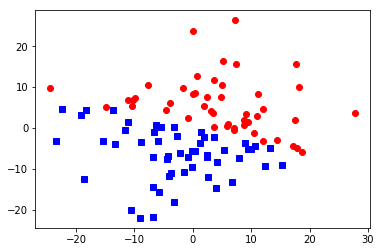

In [21]:
# plot
Xred = Xsim[np.argwhere(ysim==1),:]
Xblue = Xsim[np.argwhere(ysim==0),:]
plt.plot(Xred[:,0,0], Xred[:,0,1], 'ro', Xblue[:,0,0], Xblue[:,0,1], 'bs')

# TO DO: increase the number of observations and observe the changes on the plot. 
# How will the number of observations impact the predictions?

In [22]:
def compute_probs(X, W):
    return sigmoid(np.dot(X, W))

In [45]:
# training hyperparameters
epochs = 1000
learning_rate = 0.002

# initialize weights and bias
W = np.random.normal(0, 1, size=W_true.shape)

In [56]:
# train
for epoch in range(epochs):
    probs = compute_probs(Xsim, W)
    d_error = -(ysim - probs)
    W -= learning_rate * np.dot(Xsim.T, d_error)
    
    # print every 100 epochs
    if (epoch + 1) % 100 == 0:
        print('epoch:{:4d},  W[0]: {:5f},  W[1]: {:5f}'.format(epoch + 1, float(W[0]), float(W[1])))

epoch: 100,  W[0]: 2.016398,  W[1]: 6.021980
epoch: 200,  W[0]: 2.028628,  W[1]: 6.058620
epoch: 300,  W[0]: 2.040694,  W[1]: 6.094766
epoch: 400,  W[0]: 2.052600,  W[1]: 6.130435
epoch: 500,  W[0]: 2.064352,  W[1]: 6.165642
epoch: 600,  W[0]: 2.075954,  W[1]: 6.200401
epoch: 700,  W[0]: 2.087411,  W[1]: 6.234725
epoch: 800,  W[0]: 2.098727,  W[1]: 6.268628
epoch: 900,  W[0]: 2.109906,  W[1]: 6.302122
epoch:1000,  W[0]: 2.120952,  W[1]: 6.335219


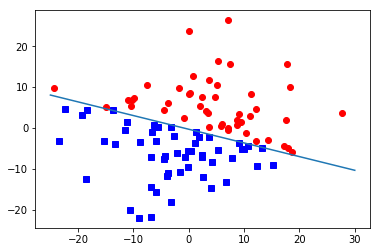

In [59]:
Xred = Xsim[np.argwhere(ysim==1),:]
Xblue = Xsim[np.argwhere(ysim==0),:]
plt.plot(Xred[:,0,0], Xred[:,0,1], 'ro', Xblue[:,0,0], Xblue[:,0,1], 'bs')
plt.plot(np.linspace(-25,30,100), -float(W[0]/W[1])*np.linspace(-25,30,100) - W[0]/W[1])

In [58]:
# TO DO:
# Change the number of epochs and the learning rate and observe what happens to the output.
# Ideally we want to see, that the values converge to W_true.
# Hint: without changing the learning rate, try epochs = 1000.

# TO DO AT HOME:
# adjust the code to account for bias

# TO DO AT HOME:
# implement perceptron as class

### Batching

Previously we assumed that weights are updated after each calculation of the output. The updates can be made every $N$ steps. Then $N$ is called the batch-size.

$$\delta = \frac{1}{N} \sum \delta_{ij}.$$

As the result, we will perform less computations to save time and average the noise out to improve convergence.

### Dropout

Dropout is a regularization method.

If one part of a neural network has very large weights, it will dominate the training proces. As a solution, some nodes are being switched off randomly with a give probability of the dropout for one training epoch.

# Word embeddings

The general idea is to embed a space with one dimension per word to a continuous vector space with a much lower dimension. How is this done?

There are many ways, but we will look at word2vec.

## Word2Vec
[https://towardsdatascience.com/learn-word2vec-by-implementing-it-in-tensorflow-45641adaf2ac]

Simplified:

1. Take a 3 layer neural network. (1 input layer + 1 hidden layer + 1 output layer)
2. Feed words and train it to predict neighbouring words.
3. Remove the last (output layer) and keep the input and hidden layer.
4. Input a word from within the vocabulary. The output given at the hidden layer is the ‘word embedding’ of the input word.

Let's see how this works

In [260]:
import tensorflow as tf
import numpy as np

corpus_raw = 'He is the king . The king is royal . She is the royal  queen '

corpus_raw = corpus_raw.lower()

words = []
for word in corpus_raw.split():
    if word not in ['.']: 
        words.append(word)

words = set(words) 
print(words)


{'she', 'he', 'king', 'queen', 'royal', 'is', 'the'}


In [263]:
word2int = {}
int2word = {}
vocab_size = len(words) # gives the total number of unique words

for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

# raw sentences is a list of sentences.
raw_sentences = corpus_raw.split('.')
sentences = []
for sentence in raw_sentences:
    sentences.append(sentence.split())

In [267]:
WINDOW_SIZE = 2 # 2-gram

data = []
for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1] : 
            if nb_word != word:
                data.append([word, nb_word])
                
print(data[0:5])

[['he', 'is'], ['he', 'the'], ['is', 'he'], ['is', 'the'], ['is', 'king']]


In [268]:
# function to convert numbers to one hot vectors
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp

print(to_one_hot(2,20))

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [262]:
x_train = [] # input word
y_train = [] # output word

for data_word in data:
    x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
    y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))

# convert them to numpy arrays
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [ ]:
# Set up neural network:

# making placeholders for x_train and y_train
x = tf.placeholder(tf.float32, shape=(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))

# how large is the size of the vector space that embeds the initial vs?
EMBEDDING_DIM = 5 

W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM])) # input size x embedding size
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM])) #bias
hidden_representation = tf.add(tf.matmul(x,W1), b1) # hidden layer 

W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size])) # embedding size x input size
b2 = tf.Variable(tf.random_normal([vocab_size]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_representation, W2), b2))

In [284]:
# Train model
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

# define the loss function:
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))

# define the training step:
train_step = tf.train.GradientDescentOptimizer(0.005).minimize(cross_entropy_loss)

# train for n_iter iterations
n_iters = 20000

for i in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})
    if i % 1000 == 0:
        print('loss at iteration %d is : %f ' %(i, sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train})))

loss at iteration 0 is : 3.321847 
loss at iteration 1000 is : 1.756391 
loss at iteration 2000 is : 1.614842 
loss at iteration 3000 is : 1.541115 
loss at iteration 4000 is : 1.491600 
loss at iteration 5000 is : 1.456655 
loss at iteration 6000 is : 1.430953 
loss at iteration 7000 is : 1.411477 
loss at iteration 8000 is : 1.396449 
loss at iteration 9000 is : 1.384690 
loss at iteration 10000 is : 1.375362 
loss at iteration 11000 is : 1.367854 
loss at iteration 12000 is : 1.361727 
loss at iteration 13000 is : 1.356662 
loss at iteration 14000 is : 1.352425 
loss at iteration 15000 is : 1.348848 
loss at iteration 16000 is : 1.345804 
loss at iteration 17000 is : 1.343198 
loss at iteration 18000 is : 1.340955 
loss at iteration 19000 is : 1.339016 


In [285]:
# generate vectors
vectors = sess.run(W1 + b1)

In [286]:
from sklearn.manifold import TSNE
from sklearn import preprocessing

model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors) 

normalizer = preprocessing.Normalizer()
vectors =  normalizer.fit_transform(vectors, 'l2')

print(vectors)

[[ 0.8681835   0.49624342]
 [-0.3429638   0.93934864]
 [ 0.844287   -0.53589123]
 [ 0.13640341 -0.99065334]
 [-0.63507986 -0.7724465 ]
 [-0.9996227   0.0274664 ]
 [-0.15002593 -0.98868203]]


In [287]:
def euclidean_dist(v1, v2):
    return np.sqrt(np.sum((v1-v2)**2))

def find_closest(word_index, vectors):
    min_dist = 10000 # to act like positive infinity
    min_index = -1
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        if euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):
            min_dist = euclidean_dist(vector, query_vector)
            min_index = index
    return min_index

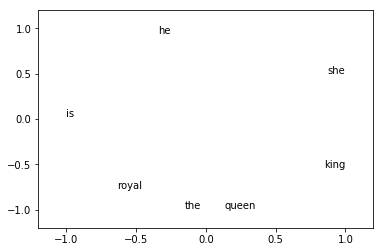

In [292]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for word in words:
    #print(word, vectors[word2int[word]][0], vectors[word2int[word]][1])
    plt.annotate(word, (vectors[word2int[word]][0],vectors[word2int[word]][1] ))
plt.xlim([-1.2,1.2])
plt.ylim([-1.2,1.2])
plt.show()

In [311]:
print(int2word[find_closest(word2int['king'], vectors)])
print(int2word[find_closest(word2int['king']+word2int['she']-word2int['he'], vectors)])

queen
is


In [304]:
import gensim.downloader as api

word_vectors = api.load("glove-wiki-gigaword-50")  # load pre-trained word-vectors from gensim-data

[==================================================] 100.0% 66.0/66.0MB downloaded
queen: 0.8524


In [310]:
result = word_vectors.most_similar(positive=['she', 'king'], negative=['he'])
print("{}: {:.4f}".format(*result[0]))

result = word_vectors.most_similar(positive=['king'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.8800
prince: 0.8236
